# ***PREPROCESSING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_bpom.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    1744 non-null   object
 1   Username     1744 non-null   object
 2   Rating       1744 non-null   int64 
 3   Review Text  1744 non-null   object
 4   Date         1744 non-null   object
dtypes: int64(1), object(4)
memory usage: 68.3+ KB


In [ ]:
data.head(2)

,Review ID,Username,Rating,Review Text,Date
0,f242e1b5-88a7-4a52-ae0b-7fae1d87006c,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,2025-04-09 04:59:14
1,40c1afc7-024a-47da-8008-1dac4e28e750,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",2025-04-08 11:22:40


In [ ]:
df  = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di..."
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di..."
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...


**PROSES HAPUS DATA DUPLIKAT**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1744 non-null   object
 1   Username     1744 non-null   object
 2   Rating       1744 non-null   int64 
 3   Review Text  1744 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.6+ KB


In [ ]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1615 non-null   object
 1   Username     1615 non-null   object
 2   Rating       1615 non-null   int64 
 3   Review Text  1615 non-null   object
dtypes: int64(1), object(3)
memory usage: 63.1+ KB


In [ ]:
df.head(2)

,Date,Username,Rating,Review Text
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di..."


**WORDCLOUD SEBELUM PREPROCESSING**





---



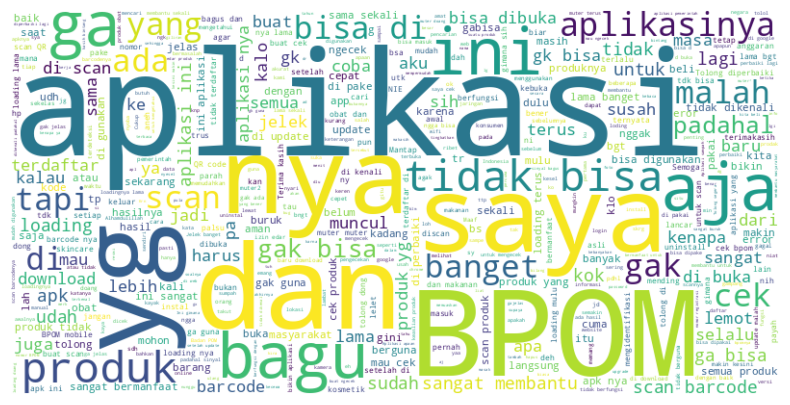

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

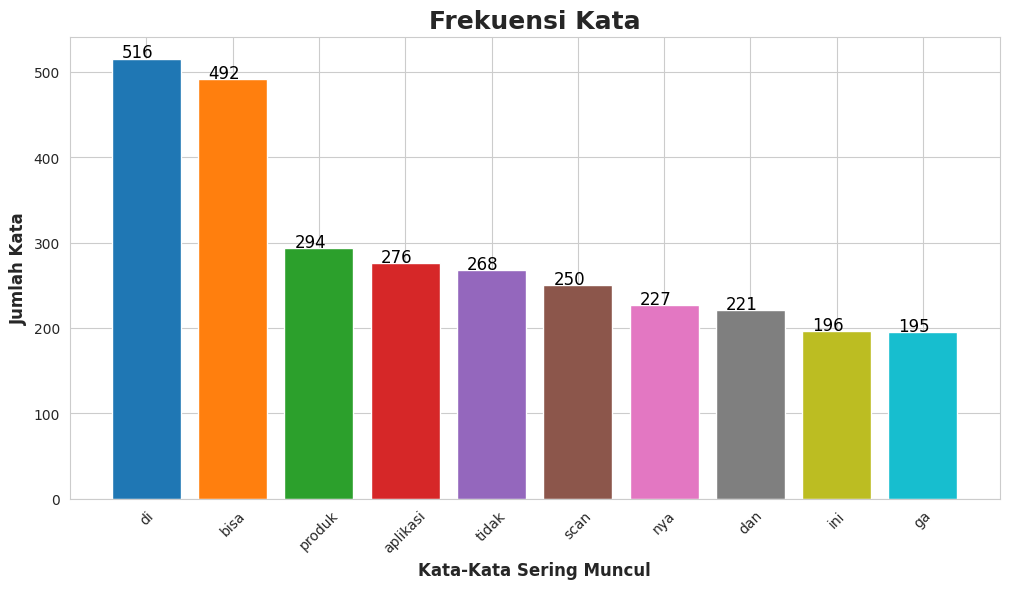

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...
5,2025-04-04 05:26:34,Sakura Strawberry,1,Makin lama makin gak bener nih aplikasi. Mau n...,Makin lama makin gak bener nih aplikasi Mau ng...
6,2025-04-03 11:54:27,Audy Gstar,1,pas masuk aplikasi loading mulu,pas masuk aplikasi loading mulu
7,2025-04-03 05:31:42,Tegar Aditya agustine,1,Loading mulu,Loading mulu
8,2025-03-31 18:06:24,boru Lungun,1,lama kali loading y,lama kali loading y
9,2025-03-31 09:06:42,Nirwana,4,banyak yang bilang aplikasinya tidak bagus pad...,banyak yang bilang aplikasinya tidak bagus pad...


# ***PREPROCESSING TEKS***

**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...,aplikasi ndak ada gunaapa saja kode yg diketik...
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...,aneh produk yg saya scan semua tidak dapat dik...
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama ga kel...
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...,apk ga guna jaringan lancar loading lamaaa dis...
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...


**Normalisasi Kata**

---



In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data =  pd.DataFrame(df[['Date','Username','Rating','Review Text','cleaning','case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...,aplikasi ndak ada gunaapa saja kode yg diketik...
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...,aneh produk yg saya scan semua tidak dapat dik...
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama ga kel...
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...,apk ga guna jaringan lancar loading lamaaa dis...
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

df =  pd.DataFrame(data[['Date','Username','Rating','Review Text','cleaning','case_folding','normalisasi']])

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...,aplikasi ndak ada gunaapa saja kode yg diketik...,aplikasi indak ada gunaapa saja kode yang dike...
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...,aneh produk yg saya scan semua tidak dapat dik...,aneh produk yang saya scan semua tidak dapat d...
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama tidak ...
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...,apk ga guna jaringan lancar loading lamaaa dis...,apk tidak guna jaringan lancar loading lamaaa ...
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi ya bagus bisa scan produk untuk di la...


**TOKENIZATION**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...,aplikasi ndak ada gunaapa saja kode yg diketik...,aplikasi indak ada gunaapa saja kode yang dike...,"[aplikasi, indak, ada, gunaapa, saja, kode, ya..."
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...,aneh produk yg saya scan semua tidak dapat dik...,aneh produk yang saya scan semua tidak dapat d...,"[aneh, produk, yang, saya, scan, semua, tidak,..."
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama tidak ...,"[pas, mau, scan, barkode, cek, lokasinya, lama..."
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...,apk ga guna jaringan lancar loading lamaaa dis...,apk tidak guna jaringan lancar loading lamaaa ...,"[apk, tidak, guna, jaringan, lancar, loading, ..."
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi ya bagus bisa scan produk untuk di la...,"[aplikasi, ya, bagus, bisa, scan, produk, untu..."


**PROSES STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...,aplikasi ndak ada gunaapa saja kode yg diketik...,aplikasi indak ada gunaapa saja kode yang dike...,"[aplikasi, indak, ada, gunaapa, saja, kode, ya...","[aplikasi, indak, gunaapa, kode, diketik, jawa..."
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...,aneh produk yg saya scan semua tidak dapat dik...,aneh produk yang saya scan semua tidak dapat d...,"[aneh, produk, yang, saya, scan, semua, tidak,...","[aneh, produk, scan, dikenali, scannya]"
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama tidak ...,"[pas, mau, scan, barkode, cek, lokasinya, lama...","[pas, scan, barkode, cek, lokasinya, kelar, ke..."
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...,apk ga guna jaringan lancar loading lamaaa dis...,apk tidak guna jaringan lancar loading lamaaa ...,"[apk, tidak, guna, jaringan, lancar, loading, ...","[apk, jaringan, lancar, loading, lamaaa, disca..."
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi ya bagus bisa scan produk untuk di la...,"[aplikasi, ya, bagus, bisa, scan, produk, untu...","[aplikasi, ya, bagus, scan, produk, laporkan, ..."


**PROSES STEMMING DATA**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi ndak ada Guna..apa saja kode yg diket...,aplikasi ndak ada Gunaapa saja kode yg diketik...,aplikasi ndak ada gunaapa saja kode yg diketik...,aplikasi indak ada gunaapa saja kode yang dike...,"[aplikasi, indak, ada, gunaapa, saja, kode, ya...","[aplikasi, indak, gunaapa, kode, diketik, jawa...",aplikasi indak gunaapa kode ketik jawab ketemu
1,2025-04-08 11:22:40,syifa destiana,1,"aneh, produk yg saya scan semua tidak dapat di...",aneh produk yg saya scan semua tidak dapat dik...,aneh produk yg saya scan semua tidak dapat dik...,aneh produk yang saya scan semua tidak dapat d...,"[aneh, produk, yang, saya, scan, semua, tidak,...","[aneh, produk, scan, dikenali, scannya]",aneh produk scan nali scannya
2,2025-04-06 16:49:01,Yadi Mulyadi,1,Pas mau scan barkode cek lokasinya lama ga kel...,Pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama ga kel...,pas mau scan barkode cek lokasinya lama tidak ...,"[pas, mau, scan, barkode, cek, lokasinya, lama...","[pas, scan, barkode, cek, lokasinya, kelar, ke...",pas scan barkode cek lokasi kelar kelarkaya gu...
3,2025-04-05 09:24:00,Random Accrifki2,1,"apk ga guna jaringan lancar loading lamaaa, di...",apk ga guna jaringan lancar loading lamaaa dis...,apk ga guna jaringan lancar loading lamaaa dis...,apk tidak guna jaringan lancar loading lamaaa ...,"[apk, tidak, guna, jaringan, lancar, loading, ...","[apk, jaringan, lancar, loading, lamaaa, disca...",apk jaring lancar loading lamaaa discan kali k...
4,2025-04-05 06:02:00,Ralph7,5,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi nya bagus bisa scan produk untuk di l...,aplikasi ya bagus bisa scan produk untuk di la...,"[aplikasi, ya, bagus, bisa, scan, produk, untu...","[aplikasi, ya, bagus, scan, produk, laporkan, ...",aplikasi ya bagus scan produk lapor informasi ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1743
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1615 non-null   object
 1   Username          1615 non-null   object
 2   Rating            1615 non-null   int64 
 3   Review Text       1615 non-null   object
 4   cleaning          1615 non-null   object
 5   case_folding      1615 non-null   object
 6   normalisasi       1615 non-null   object
 7   tokenize          1615 non-null   object
 8   stopword removal  1615 non-null   object
 9   steming_data      1615 non-null   object
dtypes: int64(1), object(9)
memory usage: 203.3+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



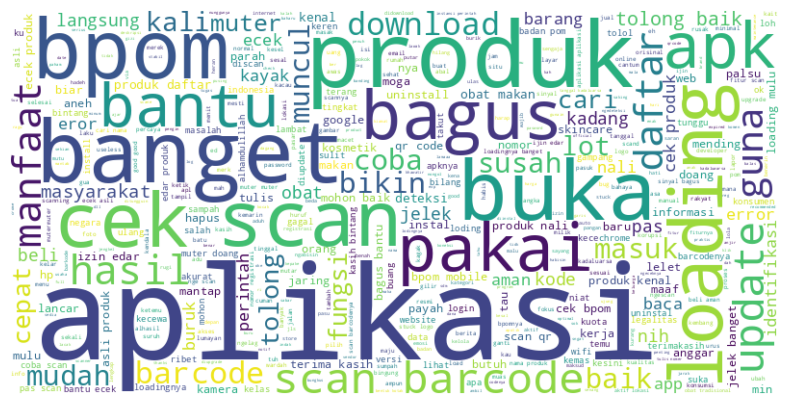

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

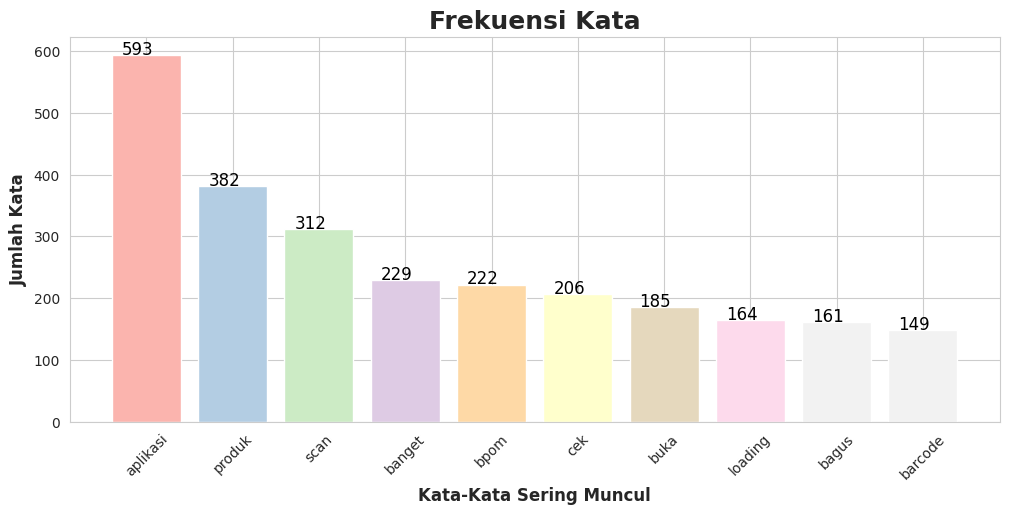

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df["steming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()


In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBALAN DATA METODE LAXICON BASED***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()
# data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1615 non-null   object
 1   Username          1615 non-null   object
 2   Rating            1615 non-null   int64 
 3   Review Text       1615 non-null   object
 4   cleaning          1604 non-null   object
 5   case_folding      1604 non-null   object
 6   normalisasi       1602 non-null   object
 7   tokenize          1615 non-null   object
 8   stopword removal  1615 non-null   object
 9   steming_data      1590 non-null   object
dtypes: int64(1), object(9)
memory usage: 126.3+ KB


In [ ]:
# Total entries setelah dilakukan preprocessing teks dan dropna
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, 0 to 1614
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1590 non-null   object
 1   Username          1590 non-null   object
 2   Rating            1590 non-null   int64 
 3   Review Text       1590 non-null   object
 4   cleaning          1590 non-null   object
 5   case_folding      1590 non-null   object
 6   normalisasi       1590 non-null   object
 7   tokenize          1590 non-null   object
 8   stopword removal  1590 non-null   object
 9   steming_data      1590 non-null   object
dtypes: int64(1), object(9)
memory usage: 136.6+ KB


In [ ]:
data = pd.DataFrame(data[['Date','Username','Rating','steming_data']])
data.head(5)

,Date,Username,Rating,steming_data
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi indak gunaapa kode ketik jawab ketemu
1,2025-04-08 11:22:40,syifa destiana,1,aneh produk scan nali scannya
2,2025-04-06 16:49:01,Yadi Mulyadi,1,pas scan barkode cek lokasi kelar kelarkaya gu...
3,2025-04-05 09:24:00,Random Accrifki2,1,apk jaring lancar loading lamaaa discan kali k...
4,2025-04-05 06:02:00,Ralph7,5,aplikasi ya bagus scan produk lapor informasi ...


In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(5)

,Date,Username,Rating,steming_data,Score,Sentiment
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi indak gunaapa kode ketik jawab ketemu,-1,Negatif
1,2025-04-08 11:22:40,syifa destiana,1,aneh produk scan nali scannya,1,Positif
2,2025-04-06 16:49:01,Yadi Mulyadi,1,pas scan barkode cek lokasi kelar kelarkaya gu...,-2,Negatif
3,2025-04-05 09:24:00,Random Accrifki2,1,apk jaring lancar loading lamaaa discan kali k...,-1,Negatif
4,2025-04-05 06:02:00,Ralph7,5,aplikasi ya bagus scan produk lapor informasi ...,3,Positif


/tmp/ipython-input-337-1910355637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


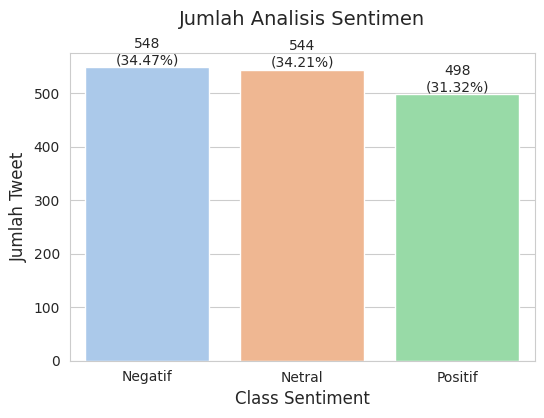

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data.csv',encoding='utf8', index=False)

**WORDCLOUD**

---



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head(5)

,Date,Username,Rating,steming_data,Score,Sentiment
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi indak gunaapa kode ketik jawab ketemu,-1,Negatif
1,2025-04-08 11:22:40,syifa destiana,1,aneh produk scan nali scannya,1,Positif
2,2025-04-06 16:49:01,Yadi Mulyadi,1,pas scan barkode cek lokasi kelar kelarkaya gu...,-2,Negatif
3,2025-04-05 09:24:00,Random Accrifki2,1,apk jaring lancar loading lamaaa discan kali k...,-1,Negatif
4,2025-04-05 06:02:00,Ralph7,5,aplikasi ya bagus scan produk lapor informasi ...,3,Positif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

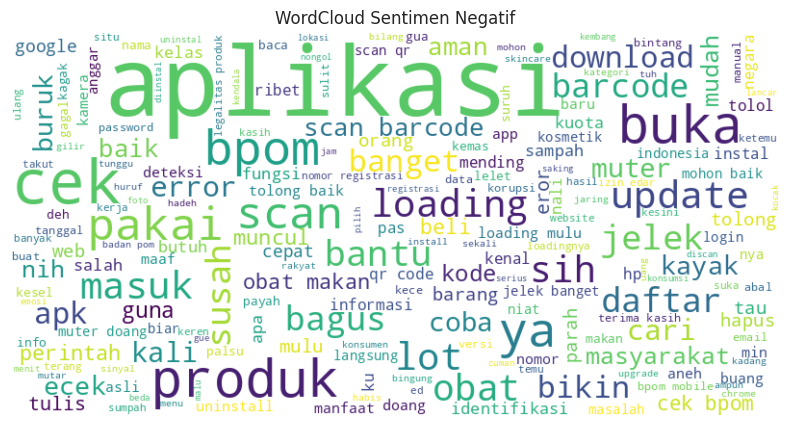

In [ ]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

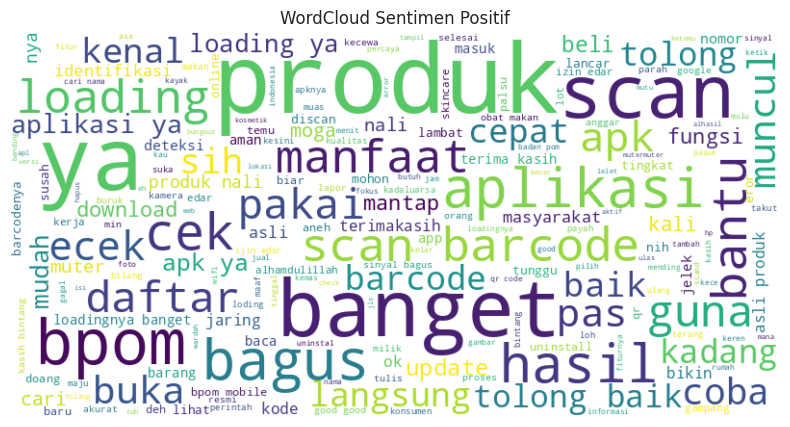

In [ ]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

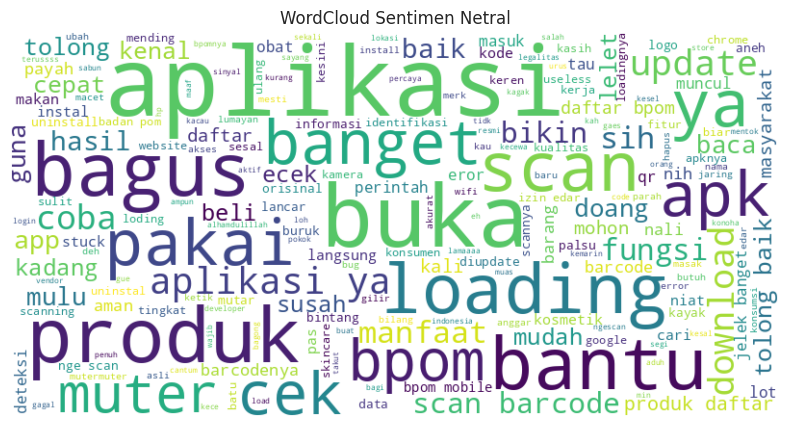

In [ ]:
# Membuat WordCloud untuk sentimen Netral
create_wordcloud(sentimen_Neutral, 'WordCloud Sentimen Netral')

# **SPLITTING DATA**

In [ ]:
import pandas as pd

file_path = 'Hasil_Labelling_Data.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1590 non-null   object
 1   Username      1590 non-null   object
 2   Rating        1590 non-null   int64 
 3   steming_data  1590 non-null   object
 4   Score         1590 non-null   int64 
 5   Sentiment     1590 non-null   object
dtypes: int64(2), object(4)
memory usage: 74.7+ KB


,Date,Username,Rating,steming_data,Score,Sentiment
0,2025-04-09 04:59:14,Sayaka Spt,1,aplikasi indak gunaapa kode ketik jawab ketemu,-1,Negatif
1,2025-04-08 11:22:40,syifa destiana,1,aneh produk scan nali scannya,1,Positif
2,2025-04-06 16:49:01,Yadi Mulyadi,1,pas scan barkode cek lokasi kelar kelarkaya gu...,-2,Negatif
3,2025-04-05 09:24:00,Random Accrifki2,1,apk jaring lancar loading lamaaa discan kali k...,-1,Negatif
4,2025-04-05 06:02:00,Ralph7,5,aplikasi ya bagus scan produk lapor informasi ...,3,Positif


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

cleaned_data = data.dropna(subset=['steming_data'])

X = cleaned_data['steming_data']
y = cleaned_data['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('===========================')

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

Jumlah data latih: 1272
Jumlah data uji: 318


((1272, 1633), (318, 1633))

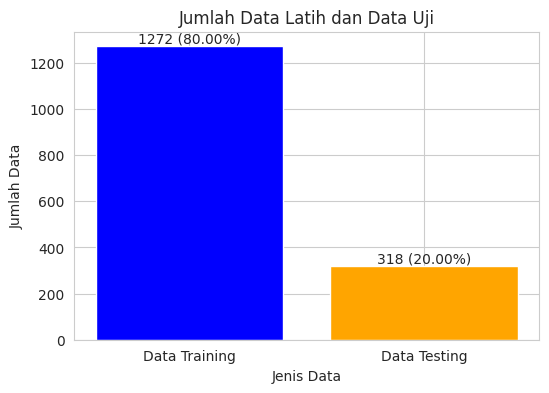

In [ ]:
import matplotlib.pyplot as plt


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# ***Algortima Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
}

# Train models
results = {}
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


Confusion Matrix for Random Forest:


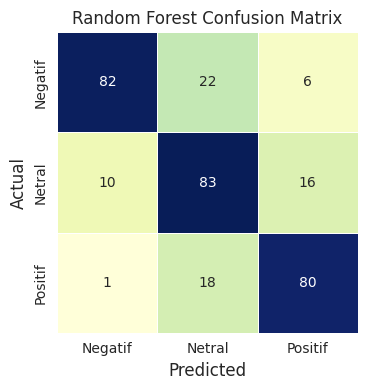

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        cbar=False,
        xticklabels=['Negatif', 'Netral', 'Positif'],
        yticklabels=['Negatif', 'Netral', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)


    plt.tight_layout()
    plt.show()

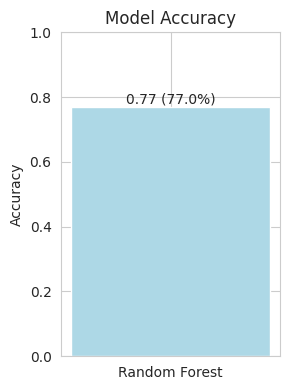

In [ ]:
import matplotlib.pyplot as plt

accuracies = {model: result['accuracy'] for model, result in results.items()}

plt.figure(figsize=(3, 4))
bars = plt.bar(list(accuracies.keys()), list(accuracies.values()), color=['lightblue'])

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Cetak akurasi dalam format desimal dan persen
print("Model Accuracy (Decimal and Percentage):")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.4f} ({accuracy * 100:.2f}%)")

Model Accuracy (Decimal and Percentage):
Random Forest: 0.7704 (77.04%)


In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)
    display(styled_df)


Classification Report for Random Forest:


,precision,recall,f1-score,support
Negatif,0.882,0.745,0.808,110.000
Netral,0.675,0.761,0.716,109.000
Positif,0.784,0.808,0.796,99.000
accuracy,0.770,0.770,0.770,0.770
macro avg,0.780,0.772,0.773,318.000
weighted avg,0.780,0.770,0.773,318.000
